In [2]:
## System requirements
import pandas as pd
import numpy as np
import json
import urllib.request
import requests

In [3]:
df = pd.read_csv('covid-19-data/public/data/owid-covid-data.csv')

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [5]:
df.shape

(36984, 36)

In [6]:
df.date.nunique()

229

In [7]:
df.location.nunique()

212

In [8]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

#####  Data Information:
We have daily data for 212 locations.
Variables: 
['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k']

In [9]:
df_latest = df.groupby('location').agg({'date': 'max', 'total_cases_per_million': 'max', 'new_cases_per_million': 'max', 'total_deaths_per_million': 'max', 'total_tests_per_thousand': 'max', 'population_density': 'max', 'total_cases': 'max', 'total_deaths': 'max'}).reset_index()

In [11]:
df_latest.describe([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2)

,total_cases_per_million,new_cases_per_million,total_deaths_per_million,total_tests_per_thousand,population_density,total_cases,total_deaths
count,210.00,210.00,210.00,89.00,200.00,211.00,211.00
mean,3440.26,208.10,94.55,92.41,360.37,201077.28,7233.77
std,5129.39,450.05,173.75,123.75,1573.68,1527542.38,54338.14
min,2.75,0.42,0.00,1.66,0.14,3.00,0.00
10%,86.63,5.66,0.08,5.73,15.31,133.00,1.00
25%,303.14,19.99,4.58,13.57,37.62,824.50,11.50
50%,1297.73,66.78,22.51,55.90,87.25,4988.00,93.00
75%,4580.75,226.07,97.68,117.38,213.88,41336.00,665.00
90%,8524.37,506.71,282.50,202.23,438.66,168290.00,6021.00
95%,14429.93,852.40,485.25,281.12,799.75,340819.00,17414.50


In [12]:
## Plotting
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [408]:
output_file('aa.html')
source = ColumnDataSource(df_latest)
p = figure()
p.circle(x='total_cases', y='population_density',
         source=source,
         size=10, color='green')
hover = HoverTool()
hover.tooltips=[
    ('total cases', '@total_cases'),
    ('population_density', '@population_density'),
    ('total deaths', '@total_deaths')
]

p.add_tools(hover)

show(p)

In [33]:
df_latest.sort_values(['total_cases_per_million'], ascending=[1])

,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,total_tests_per_thousand,population_density,total_cases,total_deaths
149,Papua New Guinea,2020-05-28,0.894,0.559,0.000,NaN,18.220,8,0
111,Lesotho,2020-05-28,0.934,0.467,0.000,NaN,73.562,2,0
4,Angola,2020-05-28,2.160,0.274,0.122,NaN,23.890,71,4
108,Laos,2020-05-28,2.611,0.550,0.000,NaN,29.715,19,0
206,Vietnam,2020-05-28,3.359,0.267,0.000,2.681,308.127,327,0
32,Burundi,2020-05-28,3.532,1.261,0.084,NaN,423.062,42,1
134,Myanmar,2020-05-28,3.786,0.386,0.110,0.419,81.721,206,6
119,Malawi,2020-05-28,5.280,0.941,0.209,NaN,197.519,101,4
196,Uganda,2020-05-28,6.143,0.940,0.000,1.965,213.759,281,0
63,Ethiopia,2020-05-28,6.359,0.765,0.052,0.840,104.957,731,6


#####  Indian Regression Model

In [35]:
df_ind = df[df.location=='India']

In [38]:
df_ind_1 = df_ind[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million',  'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units']]

In [39]:
df_ind_1

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units
8748,2019-12-31,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8749,2020-01-01,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8750,2020-01-02,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8751,2020-01-03,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8752,2020-01-04,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753,2020-01-05,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8754,2020-01-06,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8755,2020-01-07,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,2020-01-08,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,2020-01-09,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Linear Regression on Corona Cases for India

In [15]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [78]:
df_ind = df[df.iso_code == 'IND']

In [79]:
## Finding date with first case and filtering the data from that point
df_ind = df_ind[df_ind.total_cases > 0]

In [80]:
## first case reported on 30th January 2020
df_ind.location.unique()

array(['India'], dtype=object)

In [81]:
df_ind = df_ind[['date', 'total_cases', 'new_cases', 'total_deaths', 
                 'new_deaths',  'new_tests', 'total_tests', 'tests_per_case', 
                 'positive_rate', 'population', 'population_density', 
                'median_age', 'aged_65_older','stringency_index',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']]

In [50]:
df_ind.life_expectancy.unique()

array([450.419])

In [31]:
df_var = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 
                 'new_deaths',  'new_tests', 'total_tests', 'tests_per_case', 
                 'positive_rate', 'population', 'population_density', 
                'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']]

In [32]:
df_var.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,tests_per_case,positive_rate,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [52]:
df_cp = df_var.dropna()

In [55]:
df_cp.location.unique()

array(['Bangladesh', 'Colombia', 'Costa Rica', 'El Salvador', 'Ethiopia',
       'Ghana', 'India', 'Indonesia', 'Kazakhstan', 'Kenya', 'Mexico',
       'Myanmar', 'Nepal', 'Pakistan', 'Paraguay', 'South Africa',
       'Thailand', 'Togo', 'Tunisia', 'Uganda', 'Vietnam', 'Zimbabwe'],
      dtype=object)

In [59]:
df_continent = df.groupby(['continent', 'date']).agg({'new_cases': 'sum', 'total_cases': 'sum', 
                                                      'total_deaths': 'sum', 'new_deaths': 'sum', 
                                                      'new_tests': 'sum', 
                                                      'total_tests': 'sum', 'positive_rate': 'mean', 
                                                     'stringency_index': 'mean', 'population_density': 'mean',
                                                     'median_age': 'mean', 'aged_70_older': 'mean', 
                                                      'gdp_per_capita': 'mean', 'extreme_poverty': 'mean',
                                                      'cardiovasc_death_rate': 'mean', 'diabetes_prevalence':'mean'}).reset_index()

In [67]:
df_continent[df_continent.date == '2020-08-15'].sort_values(by = 'new_cases', ascending = False)

,continent,date,new_cases,total_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,stringency_index,population_density,median_age,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
457,Asia,2020-08-15,95916.0,5512064.0,117229.0,1519.0,0.0,0.0,NaN,NaN,445.049136,30.158696,3.942739,22185.363295,5.767857,290.287261,9.351818
1373,South America,2020-08-15,84099.0,5136357.0,173028.0,1935.0,0.0,0.0,NaN,NaN,24.392000,30.216667,5.186000,13840.785250,2.866667,187.323917,7.810833
915,North America,2020-08-15,76850.0,6316513.0,242102.0,2067.0,0.0,0.0,NaN,NaN,270.565545,33.128000,6.227960,21655.243704,5.718182,197.066885,10.880968
686,Europe,2020-08-15,18686.0,2781889.0,173928.0,287.0,0.0,0.0,NaN,37.96,638.055255,41.982051,11.717763,33338.380756,0.900000,233.428325,6.544186
228,Africa,2020-08-15,12689.0,1098277.0,25102.0,422.0,0.0,0.0,NaN,NaN,103.492453,21.210909,2.167527,5443.837132,34.100000,287.297426,5.629444
1144,Oceania,2020-08-15,434.0,25040.0,408.0,14.0,0.0,0.0,NaN,NaN,75.732750,32.071429,5.978571,23315.180500,0.950000,286.065333,16.114286


In [68]:
df.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

##### Visualizations for India

In [134]:
## Plotting
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [75]:
## Filtering the data for suitable data matches and across variables
df_ind[df_ind.new_tests.isnull()].date.unique()

array(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-08-14',
       '2020-08-15'], dtype=object)

In [87]:
df_ind.columns

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests', 'total_tests', 'tests_per_case', 'positive_rate',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'stringency_index', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

In [86]:
df_ind['stringency_index'].fillna(79.63, inplace=True)

In [97]:
## For each variable give null dates
col_null = []
for col in df_ind.columns:
    if len(list(df_ind[df_ind[col].isnull()]['date'])) > 0:
        col_null.append(col)
        print (col, " null date values for dates: ", set(list(pd.to_datetime(df_ind[df_ind[col].isnull()]['date']).dt.month)))

new_tests  null date values for dates:  {1, 2, 3, 4, 8}
total_tests  null date values for dates:  {1, 2, 3, 4, 8}
tests_per_case  null date values for dates:  {8, 1, 2, 3}
positive_rate  null date values for dates:  {8, 1, 2, 3}


In [99]:
for col in df_ind.columns:
    if len(list(df_ind[df_ind[col].isnull()]['date'])) > 0:
        print (col, " null date values for dates: ", set(list(df_ind[df_ind[col].isnull()]['date'])))

new_tests  null date values for dates:  {'2020-02-07', '2020-02-20', '2020-03-27', '2020-03-01', '2020-03-06', '2020-02-22', '2020-03-08', '2020-03-16', '2020-02-08', '2020-03-07', '2020-03-04', '2020-04-01', '2020-02-06', '2020-03-03', '2020-08-15', '2020-03-11', '2020-03-05', '2020-03-02', '2020-02-09', '2020-02-21', '2020-02-27', '2020-02-15', '2020-02-13', '2020-03-14', '2020-01-30', '2020-04-22', '2020-02-17', '2020-03-26', '2020-08-14', '2020-03-10', '2020-02-18', '2020-02-01', '2020-02-05', '2020-02-11', '2020-02-29', '2020-02-14', '2020-02-25', '2020-02-28', '2020-03-13', '2020-03-28', '2020-03-12', '2020-03-15', '2020-02-26', '2020-03-31', '2020-02-03', '2020-02-16', '2020-01-31', '2020-02-23', '2020-02-19', '2020-03-30', '2020-04-21', '2020-02-12', '2020-02-02', '2020-03-25', '2020-02-10', '2020-03-29', '2020-04-20', '2020-04-19', '2020-02-24', '2020-03-17', '2020-02-04'}
total_tests  null date values for dates:  {'2020-02-07', '2020-02-20', '2020-03-27', '2020-03-01', '2020-

In [100]:
col_null

['new_tests', 'total_tests', 'tests_per_case', 'positive_rate']

In [101]:
df_impute = df_ind[['date','new_tests', 'total_tests', 'tests_per_case', 'positive_rate']]

In [103]:
df_impute['datetime'] = pd.to_datetime(df_ind['date'])
df_impute['month'] = df_impute['datetime'].dt.month

/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
df_imp_vals = df_impute.groupby('month')['new_tests', 'total_tests', 'tests_per_case', 'positive_rate'].mean().reset_index()

In [111]:
df_imp_vals

,month,new_tests,total_tests,tests_per_case,positive_rate
0,1,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN
2,3,1717.000000,1.744200e+04,39.078538,0.029692
3,4,30229.880000,3.591524e+05,25.854933,0.039100
4,5,94663.000000,2.288044e+06,22.962323,0.045903
5,6,166312.600000,6.169970e+06,13.705267,0.073567
6,7,339744.322581,1.343263e+07,10.073290,0.100000
7,8,641212.076923,2.347893e+07,10.465077,0.095923


In [107]:
df_impute['weekofyear'] = df_impute['datetime'].dt.week

/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
df_impute.head()

,date,new_tests,total_tests,tests_per_case,positive_rate,datetime,month,weekofyear
15527,2020-01-30,NaN,NaN,NaN,NaN,2020-01-30,1,5
15528,2020-01-31,NaN,NaN,NaN,NaN,2020-01-31,1,5
15529,2020-02-01,NaN,NaN,NaN,NaN,2020-02-01,2,5
15530,2020-02-02,NaN,NaN,NaN,NaN,2020-02-02,2,5
15531,2020-02-03,NaN,NaN,NaN,NaN,2020-02-03,2,6


In [112]:
df_imp_vals_week = df_impute.groupby('weekofyear')['new_tests', 'total_tests', 'tests_per_case', 'positive_rate'].mean().reset_index()

In [114]:
for col in col_null:
    df_imp_vals_week.rename(columns = {col: col+'_imp'}, inplace = True)

In [118]:
df_imp_vals_week
df_ind['weekofyear'] = pd.to_datetime(df_ind['date']).dt.week

In [120]:
df_ind_2 = pd.merge(df_ind, df_imp_vals_week, on=['weekofyear'], how = 'left')

In [123]:
df_ind_2.new_tests.fillna(df_ind_2.new_tests_imp, inplace= True)

In [126]:
df_ind_2.tests_per_case.fillna(df_ind_2.tests_per_case_imp, inplace= True)
df_ind_2.positive_rate.fillna(df_ind_2.positive_rate_imp, inplace= True)

In [127]:
df_ind_2.drop(columns=['total_tests'], inplace=True)

In [130]:
df_ind_2.shape

(198, 28)

In [132]:
df_ind_3 = df_ind_2.dropna()

In [133]:
df_ind_3.head()

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,tests_per_case,positive_rate,population,population_density,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,weekofyear,new_tests_imp,total_tests_imp,tests_per_case_imp,positive_rate_imp
45,2020-03-16,93.0,3.0,2.0,0.0,1516.4,62.7505,0.017,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017
46,2020-03-17,125.0,32.0,3.0,1.0,1516.4,62.7505,0.017,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017
47,2020-03-18,137.0,12.0,3.0,0.0,191.0,62.7505,0.017,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017
48,2020-03-19,165.0,28.0,3.0,0.0,1060.0,85.5980,0.012,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017
49,2020-03-20,191.0,26.0,4.0,1.0,1325.0,67.8880,0.015,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017


##### Positive Rate Change across Weeks

In [149]:
weekly = df_ind_3.groupby('weekofyear')['positive_rate', 'new_cases', 'new_deaths', 'new_tests'].mean().reset_index()

In [142]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3
output_file('simple_timeseries_plot.html')

#make sure MSNDATE is a datetime format
df_ind_3['date'] = pd.to_datetime(df_ind_3['date'])

grouped = df_ind_3.groupby('date')['new_cases', 'new_deaths'].sum()

source = ColumnDataSource(grouped)

p = figure(x_axis_type='datetime')

# p.line(x='date', y='new_tests', line_width=2, source=source, legend='new tests')
p.line(x='date', y='new_cases', line_width=2, source=source, color=Spectral3[1], legend='New Cases')
p.line(x='date', y='new_deaths', line_width=2, source=source, color=Spectral3[2], legend='New Deaths')

p.yaxis.axis_label = 'new cases and deaths with positive rate'

show(p)

/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [161]:
# source = ColumnDataSource(weekly)
import pandas_bokeh
pandas_bokeh.output_notebook()
weekly.plot_bokeh(
    kind='line',
    x='weekofyear',
    y=['positive_rate'],
    xlabel='week',
    ylabel='positive rate',
    title='WoW change in Positive Rate'
)

Loading BokehJS ...

Figure(id='3556', ...)

In [163]:
weekly.plot_bokeh(
    kind='line',
    x='weekofyear',
    y=['new_cases'],
    xlabel='week',
    ylabel='new cases',
    title='WoW change in New Cases'
)

Figure(id='3769', ...)

In [150]:
weekly.plot_bokeh(
    kind='line',
    x='weekofyear',
    y=['new_tests'],
    xlabel='week',
    ylabel='new tests',
    title='WoW change in New Test'
)

Figure(id='2860', ...)

In [153]:
df_us = df[df.iso_code == 'USA']

In [154]:
df_us['date'] = pd.to_datetime(df_us['date'])

/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
df_us['weekofyear'] = df_us.date.dt.week

/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
weekly_us = df_us.groupby(['weekofyear'])['positive_rate', 'new_cases', 'new_deaths', 'new_tests'].mean().reset_index()

In [157]:
weekly_us.plot_bokeh(
    kind='line',
    x='weekofyear',
    y=['positive_rate'],
    xlabel='week',
    ylabel='positive rate',
    title='WoW change in Positive Rate'
)

Figure(id='2999', ...)

In [158]:
weekly_us.plot_bokeh(
    kind='line',
    x='weekofyear',
    y=['new_cases'],
    xlabel='week',
    ylabel='new cases',
    title='WoW change in New Cases'
)

Figure(id='3138', ...)

In [159]:
weekly_us.plot_bokeh(
    kind='line',
    x='weekofyear',
    y=['new_tests'],
    xlabel='week',
    ylabel='new tests',
    title='WoW change in New Test'
)

Figure(id='3277', ...)

In [160]:
weekly_us.plot_bokeh(
    kind='line',
    x='weekofyear',
    y=['new_deaths'],
    xlabel='week',
    ylabel='new deaths',
    title='WoW change in New Deaths'
)

Figure(id='3416', ...)

##### Relationship between number of new cases with some variables using Pearson Correlation

In [164]:
df_ind_3.columns

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests', 'tests_per_case', 'positive_rate', 'population',
       'population_density', 'median_age', 'aged_65_older', 'stringency_index',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'weekofyear', 'new_tests_imp', 'total_tests_imp',
       'tests_per_case_imp', 'positive_rate_imp'],
      dtype='object')

In [173]:
from scipy.stats import pearsonr
pearsonr(list(df_ind_3['new_cases']), list(df_ind_3['positive_rate']))

(0.8513550383033468, 3.7442385313984515e-44)

##### Positive Correlation

In [174]:
pearsonr(list(df_ind_3['new_cases']), list(df_ind_3['stringency_index']))
## Negative Correlation

(-0.36166635451504825, 4.362074505524488e-06)

In [171]:
df_ind_3['new_cases'].describe()

count      153.000000
mean     16510.470588
std      19566.661412
min          3.000000
25%       1409.000000
50%       8171.000000
75%      24850.000000
max      66999.000000
Name: new_cases, dtype: float64

In [172]:
df_ind_3.shape

(153, 28)

In [176]:
df_ind_3.head()

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,tests_per_case,positive_rate,population,population_density,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,weekofyear,new_tests_imp,total_tests_imp,tests_per_case_imp,positive_rate_imp
45,2020-03-16,93.0,3.0,2.0,0.0,1516.4,62.7505,0.017,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017
46,2020-03-17,125.0,32.0,3.0,1.0,1516.4,62.7505,0.017,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017
47,2020-03-18,137.0,12.0,3.0,0.0,191.0,62.7505,0.017,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017
48,2020-03-19,165.0,28.0,3.0,0.0,1060.0,85.5980,0.012,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017
49,2020-03-20,191.0,26.0,4.0,1.0,1325.0,67.8880,0.015,1.380004e+09,450.419,...,1.9,20.6,59.55,0.53,69.66,12,1516.4,15704.0,62.7505,0.017


##### Dropping constant columns(Country Level Information)

In [178]:
for col in df_ind_3.columns:
    if len(list(df_ind_3[col].unique())) == 1:
        df_ind_3.drop(columns = [col], inplace=True)

/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [184]:
df_ind_3.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests', 'tests_per_case',
       'positive_rate', 'stringency_index', 'weekofyear'],
      dtype='object')

In [180]:
df_ind_3.drop(columns = ['total_cases', 'total_deaths'], inplace=True)

In [183]:
df_ind_3.drop(columns = ['new_tests_imp', 'total_tests_imp', 'tests_per_case_imp', 'positive_rate_imp'], inplace=True)

##### Multinomial Logistic Regression

In [235]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime
X = df_ind_3[['date', 'new_cases','tests_per_case', 'positive_rate', 'stringency_index']]
y = df_ind_3[['new_deaths']]
X['date']=X['date'].map(datetime.toordinal)
lr = LogisticRegression(solver='liblinear')
clf = lr.fit(X, y)
preds = lr.predict(X) 

/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/devanshsharma/anaconda3/envs/data_science/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [236]:
clf.score(X, y)

0.1895424836601307

In [237]:
clf.decision_function(X)

array([[ 1.34852461e+00, -1.13447250e+00, -2.32125645e+00, ...,
        -1.95926227e+01, -6.81896027e+00, -4.77602084e+00],
       [ 5.85691275e-01, -1.47929266e+00, -2.45335487e+00, ...,
        -1.95843033e+01, -6.81727523e+00, -4.77655703e+00],
       [ 1.10411289e+00, -1.24770398e+00, -2.34745430e+00, ...,
        -1.95900857e+01, -6.81845299e+00, -4.77619828e+00],
       ...,
       [-1.76153495e+03, -7.98005653e+02, -3.06693085e+02, ...,
        -3.15762723e-01, -2.90620741e+00, -6.00073827e+00],
       [-1.69719640e+03, -7.68922944e+02, -2.95548301e+02, ...,
        -1.01972603e+00, -3.04912044e+00, -5.95606614e+00],
       [-1.70900718e+03, -7.74261689e+02, -2.97593509e+02, ...,
        -8.90534451e-01, -3.02289755e+00, -5.96427404e+00]])

##### Linear Regression

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/5)
l = LinearRegression().fit(x_train, y_train)

In [259]:
l.score(X, y)

0.7995504396864082

In [260]:
y_pred = l.predict(x_test)

Coefficients: 
 [[ 1.99068933e+00  8.91539320e-03  1.59433017e+00  1.95297315e+03
  -1.71730305e-01]]
Mean squared error: 94436.44
Coefficient of determination: 0.47


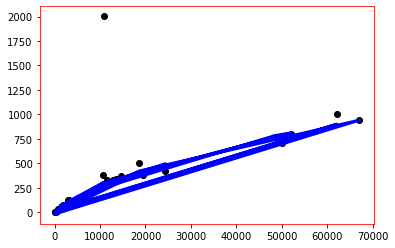

In [269]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib

# pred = l.predict(X)

# The coefficients
print('Coefficients: \n', l.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
matplotlib.rc('axes',edgecolor='r')
# Plot outputs
plt.scatter(x_test['new_cases'], y_test,  color='black')
plt.plot(x_test['new_cases'], y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.
plt.show()

In [263]:
y_pred

array([[ 67.77213865],
       [300.94683829],
       [788.46879603],
       [343.2624874 ],
       [ 11.27449209],
       [198.25500485],
       [783.54031144],
       [810.46934844],
       [306.21396565],
       [-15.78166868],
       [167.03677171],
       [112.14571952],
       [ 22.54883053],
       [899.13266805],
       [ 14.01412906],
       [305.68252498],
       [ 36.94778369],
       [ 68.31728779],
       [ 68.78801252],
       [ 94.87770074],
       [420.60493073],
       [-17.60734475],
       [940.32103747],
       [421.08147998],
       [ 76.49728   ],
       [130.41800873],
       [ 20.48802769],
       [326.46928305],
       [ 50.13558006],
       [333.01077467],
       [493.28639023]])

##### Time Series Analysis

In [271]:
## Indexing Timestamp 
df_ts = df_ind_3.set_index('date')
df_ts.index

DatetimeIndex(['2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25',
               ...
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15'],
              dtype='datetime64[ns]', name='date', length=153, freq=None)

In [273]:
daily_deaths = df_ts['new_deaths']

In [274]:
daily_deaths

date
2020-03-16       0.0
2020-03-17       1.0
2020-03-18       0.0
2020-03-19       0.0
2020-03-20       1.0
               ...  
2020-08-11     871.0
2020-08-12     834.0
2020-08-13     942.0
2020-08-14    1007.0
2020-08-15     996.0
Name: new_deaths, Length: 153, dtype: float64

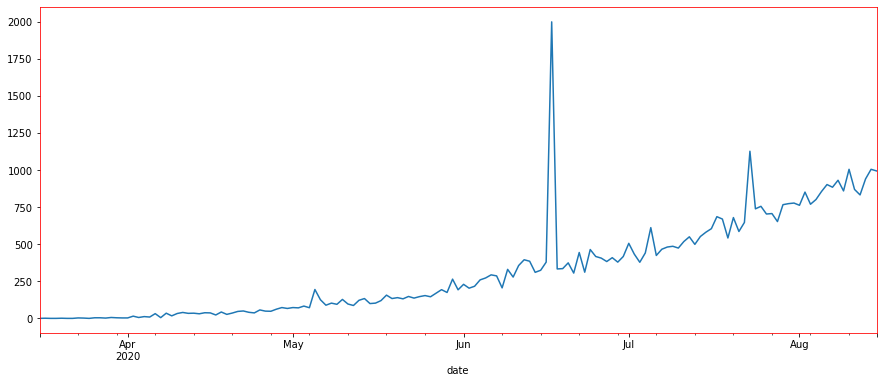

In [275]:
daily_deaths.plot(figsize=(15, 6))
plt.show()


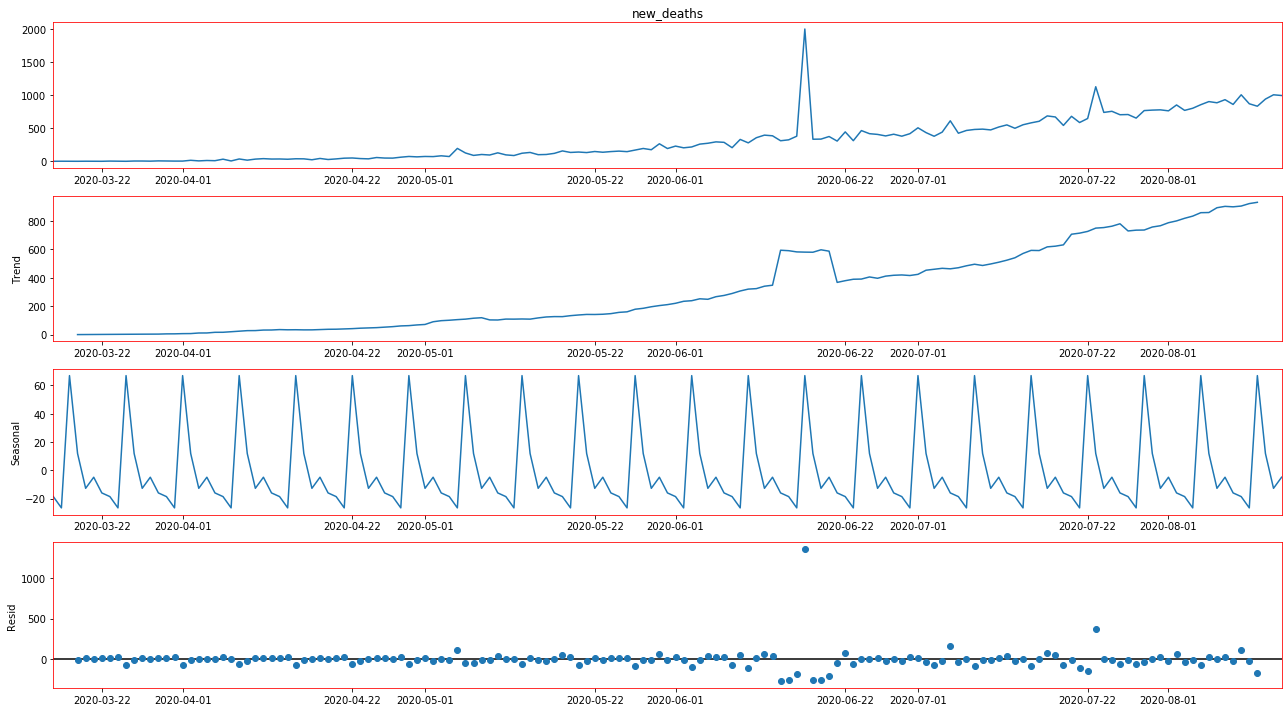

In [279]:
## Study the trend, seasonality and Noise
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(daily_deaths, model='additive')
fig = decomposition.plot()
plt.show()

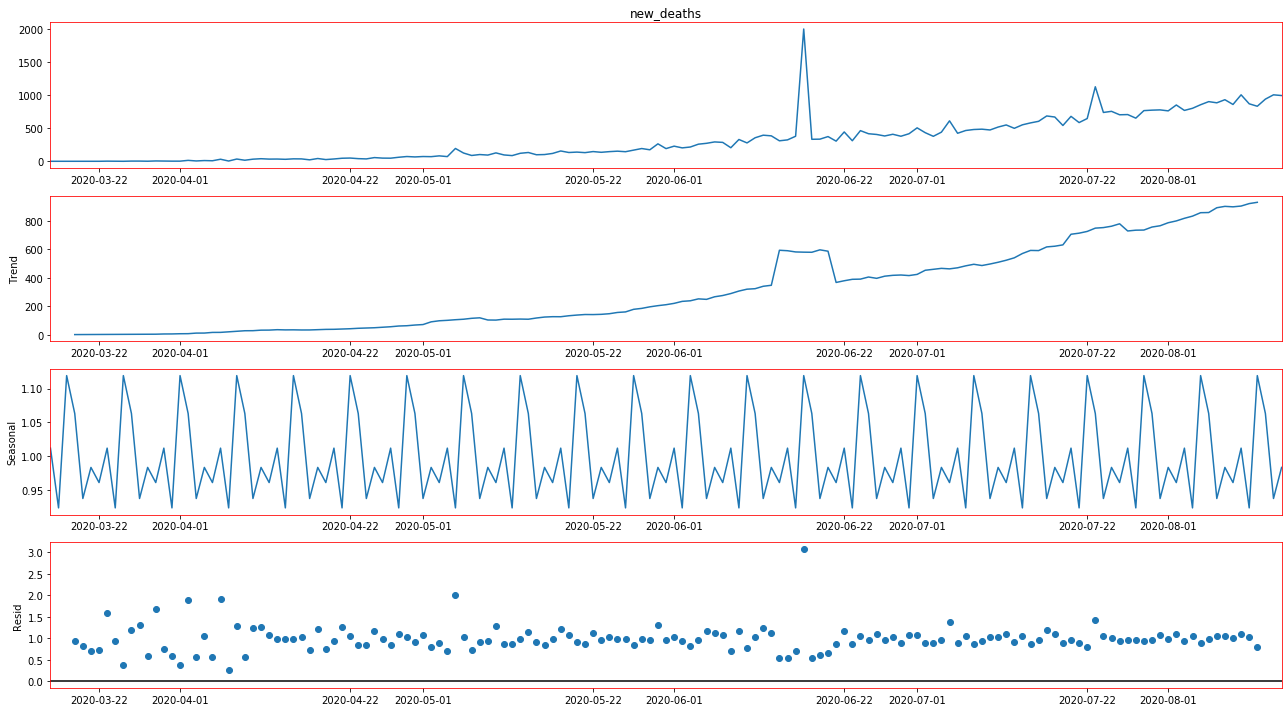

In [284]:
decomposition = sm.tsa.seasonal_decompose(daily_deaths.replace(0, 1), model='multiplicative')
fig = decomposition.plot()
plt.show()

In [340]:
daily_deaths_test = daily_deaths_test.replace(0, 1)

In [341]:
from pmdarima import 0 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(daily_deaths_test, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2064.533, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2034.951, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2080.336, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2065.958, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2010.148, Time=1.66 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2013.336, Time=1.07 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2009.236, Time=2.07 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=2035.682, Time=0.69 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.71 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=2008.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  164
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -993.113
Date:                             Thu, 27 Aug 2020   AIC                           1998.226
Time:                                     07:49:26   BIC                           2016.369
Sample:                                          0   HQIC                          2005.597
                                             - 164                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0182     17.455      0.345      0.730     -28.193      40.230
ar.L1          0.9623      0.093     10.328      0.000       0.780       1.145
ma.L1         -0.8516      0.112     -7.593      0.000      -1.071      -0.632
ar.S.L12      -0.6996      0.033    -21.208      0.000      -0.764      -0.635
ar.S.L24      -0.4417      0.048     -9.216      0.000      -0.536      -0.348
sigma2      2.581e+04   1110.298     23.247      0.000    2.36e+04     2.8e+04
===================================================================================
Ljung-Box (Q):                       15.88   Jarque-Bera (JB):             33931.65
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.08   Skew:                             6.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [347]:
# Fit a SARIMAX(1, 0, 1)x(2, 1, [], 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(daily_deaths_test,  
                order = (1, 0, 1),  
                seasonal_order =(2, 1, [], 12)) 
  
result = model.fit() 
print (result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    859.647      0.000       0.998       1.002
ma.L1         -0.8917      0.045    -19.861      0.000      -0.980      -0.804
ar.S.L12      -0.7019      0.026    -27.096      0.000      -0.753      -0.651
ar.S.L24      -0.4488      0.040    -11.238      0.000      -0.527      -0.371
sigma2      2.663e+04    730.262     36.461      0.000    2.52e+04    2.81e+04


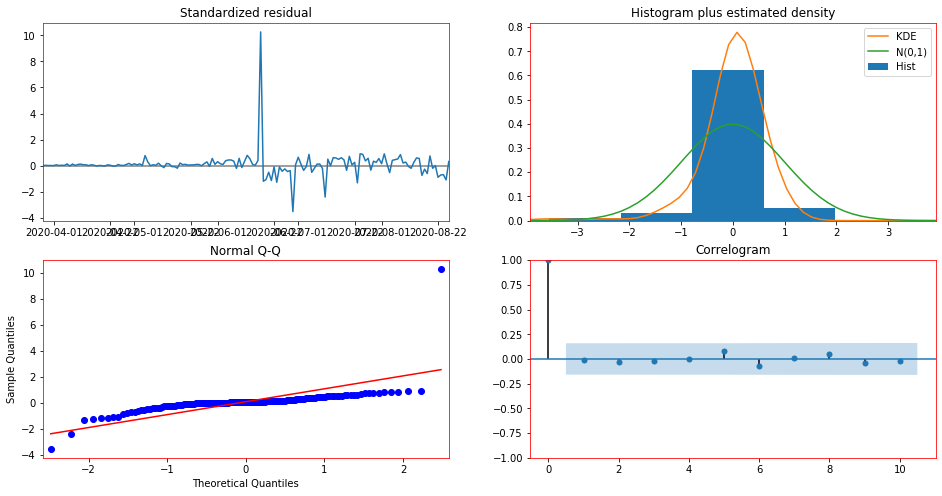

In [348]:
result.plot_diagnostics(figsize=(16, 8))
plt.show()

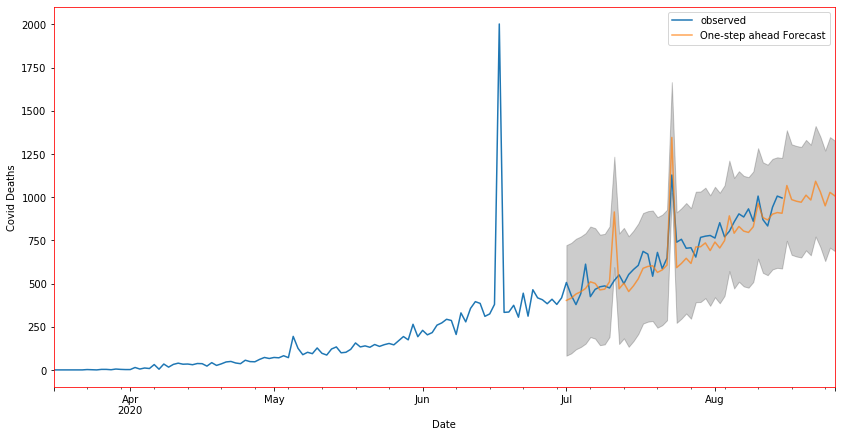

In [365]:
## Validating Forecasts
pred = result.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = daily_deaths.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Covid Deaths')
plt.legend()
plt.show()

In [297]:
## Making Validation dataset 
t = pd.read_csv('covid-19-data/public/data/owid-covid-data.csv')

In [305]:
t_ind = t[(t.iso_code == 'IND') & (t.date > '2020-08-15')]
t_1 = t_ind.set_index('date')
t_1.index

Index(['2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
       '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
       '2020-08-26'],
      dtype='object', name='date')

In [306]:
val = t_1['new_deaths']

In [307]:
val

date
2020-08-16     944.0
2020-08-17     941.0
2020-08-18     876.0
2020-08-19    1092.0
2020-08-20     977.0
2020-08-21     983.0
2020-08-22     945.0
2020-08-23     912.0
2020-08-24     836.0
2020-08-25     848.0
2020-08-26    1059.0
Name: new_deaths, dtype: float64

In [309]:
daily_deaths_test = daily_deaths.append(val)

In [409]:
y_forecasted = pred.predicted_mean
val = daily_deaths_test['2020-07-01':]
mse = ((y_forecasted - val) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

KeyError: '2020-07-01'

In [364]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 107.7


In [360]:
pred_values = pred.summary_frame()

In [368]:
actual = val.reset_index()
pred_vals = pred_values['new_death']

new_deaths,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-08-10,964.252945,163.173938,644.437903,1284.067987
2020-08-11,882.530859,163.173938,562.715817,1202.345900
2020-08-12,868.927113,163.173938,549.112071,1188.742155
2020-08-13,902.324646,163.173938,582.509604,1222.139688
2020-08-14,911.600382,163.173938,591.785340,1231.415424
2020-08-15,907.535538,163.173938,587.720497,1227.350580
2020-08-16,1068.126602,163.173938,748.311560,1387.941644
2020-08-17,986.691659,163.173938,666.876617,1306.506701
2020-08-18,977.158239,163.173938,657.343198,1296.973281
2020-08-19,971.460987,163.173938,651.645945,1291.276029


In [387]:
list(pred_values['mean'][6:])

[1068.1266018895687,
 986.6916589662069,
 977.1582394223892,
 971.460987083895,
 1012.2955613260655,
 984.1122374103969,
 1092.7127662290816,
 1030.7612195470115,
 950.4249178487563,
 1028.3651573972813,
 1008.5336635676618]

In [388]:
act_pred = pd.DataFrame()
act_pred['date'] = actual['date']
act_pred['predicted'] = list(pred_values['mean'][6:])
act_pred['actual'] = actual['new_deaths']

In [393]:
act_pred['diff'] = act_pred['predicted'] - act_pred['actual']

In [394]:
act_pred['sqdiff'] = act_pred['diff'] ** 2

In [397]:
std_dev = act_pred['sqdiff'].sum() / (act_pred.shape[0] - 1)

In [399]:
import math
std_error = std_dev / math.sqrt(act_pred.shape[0])

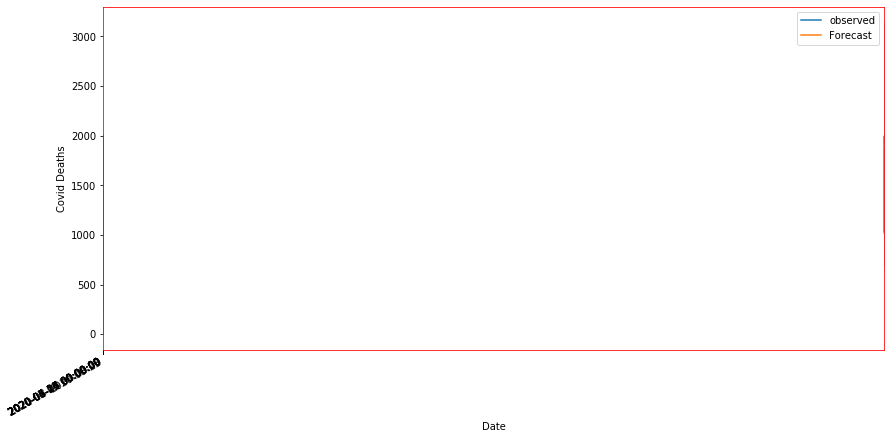

In [403]:
pred_uc = result.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = daily_deaths_test.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Covid Deaths')
plt.legend()
plt.show()

In [402]:
pred_uc.predicted_mean

2020-08-27    1017.343727
2020-08-28    1225.833717
2020-08-29    1063.998874
2020-08-30    1064.144198
2020-08-31    1100.629186
                 ...     
2020-11-30    1952.123864
2020-12-01    1912.902499
2020-12-02    1996.738757
2020-12-03    1932.512792
2020-12-04    1919.656964
Freq: D, Length: 100, dtype: float64

In [405]:
pred_ci.predicted_mean

AttributeError: 'DataFrame' object has no attribute 'predicted_mean'

In [411]:
math.sqrt(act_pred['sqdiff'].mean())

107.70312280052073

### Introducing more factors affecting the fit of the model

In [415]:
df_ind4.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests', 'tests_per_case',
       'positive_rate', 'stringency_index'],
      dtype='object')

In [414]:
df_ind4 = df_ind_3.drop(columns = ['weekofyear'])

In [416]:
df_ind4.describe([0.1,0.25,0.5,0.75,0.90,0.95,0.99]).round(2)

,new_cases,new_deaths,new_tests,tests_per_case,positive_rate,stringency_index
count,153.00,153.00,153.00,153.00,153.00,153.00
mean,16510.47,320.48,191657.19,20.03,0.06,82.95
std,19566.66,328.08,203166.76,12.18,0.03,10.77
min,3.00,0.00,157.00,8.38,0.01,48.15
10%,155.20,4.20,10870.80,10.01,0.03,75.46
25%,1409.00,47.00,41319.25,11.05,0.04,76.85
50%,8171.00,204.00,121702.00,16.25,0.06,79.17
75%,24850.00,500.00,256039.00,25.60,0.09,96.30
90%,52108.40,778.20,507782.20,30.93,0.10,100.00
95%,58656.00,893.20,663114.80,32.95,0.11,100.00


In [456]:
pandas_bokeh.output_notebook()
df_ind4.tests_per_case.plot_bokeh(kind = 'hist')

Loading BokehJS ...

Figure(id='4875', ...)

In [421]:
df_ind4['tests_category'] = df_ind4['tests_per_case'].apply(lambda x: 'LowTestsperCase' if x > 8 and x < 12 else ('MedTestperCase' if x >= 12 and x < 17 else 'HighTestperCase'))

In [422]:
df_ind4.head()

,date,new_cases,new_deaths,new_tests,tests_per_case,positive_rate,stringency_index,tests_category
45,2020-03-16,3.0,0.0,1516.4,62.7505,0.017,48.15,HighTestperCase
46,2020-03-17,32.0,1.0,1516.4,62.7505,0.017,48.15,HighTestperCase
47,2020-03-18,12.0,0.0,191.0,62.7505,0.017,50.00,HighTestperCase
48,2020-03-19,28.0,0.0,1060.0,85.5980,0.012,59.72,HighTestperCase
49,2020-03-20,26.0,1.0,1325.0,67.8880,0.015,70.83,HighTestperCase


In [423]:
df_ind4.groupby(['tests_category'])['new_deaths'].mean()

tests_category
HighTestperCase     55.214286
LowTestsperCase    686.270833
MedTestperCase     349.371429
Name: new_deaths, dtype: float64

In [424]:
df_ind4['stringency_flag'] = df_ind4['stringency_index'].apply(lambda x: 'low_stringency' if x > 48 and x <= 79 else 'high_stringency')

In [425]:
df_ind4.groupby(['stringency_flag'])['new_deaths'].mean()

stringency_flag
high_stringency    214.523256
low_stringency     456.492537
Name: new_deaths, dtype: float64

In [429]:
from fbprophet import Prophet

In [441]:
deaths = pd.DataFrame()
deaths['ds'] = daily_deaths_test.index
deaths['y'] = list(daily_deaths_test)

In [442]:
deaths

,ds,y
0,2020-03-16,1.0
1,2020-03-17,1.0
2,2020-03-18,1.0
3,2020-03-19,1.0
4,2020-03-20,1.0
5,2020-03-21,1.0
6,2020-03-22,1.0
7,2020-03-23,3.0
8,2020-03-24,2.0
9,2020-03-25,1.0


In [450]:
## deaths = daily_deaths_test.rename(columns={'date': 'ds', 'new_deaths': 'y'})
model = Prophet(interval_width=0.95)
ds_model = model.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


TypeError: float() argument must be a string or a number, not 'datetime.datetime'

<Figure size 1296x432 with 0 Axes>

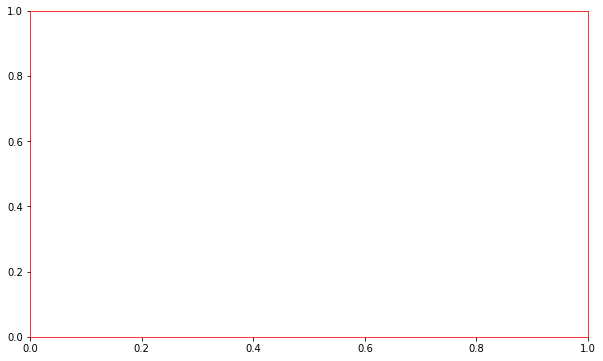

In [453]:
forecast_1 = ds_model.make_future_dataframe(periods=36, freq='MS')
forecast = ds_model.predict(furniture_forecast)
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Deaths')
plt.title('Furniture Sales')

In [455]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,-69.181766,-349.042852,189.593478,-69.181766,-69.181766,-20.470731,-20.470731,-20.470731,-20.470731,-20.470731,-20.470731,0.0,0.0,0.0,-89.652497
1,2020-03-17,-65.532087,-356.601438,169.988234,-65.532087,-65.532087,-30.115574,-30.115574,-30.115574,-30.115574,-30.115574,-30.115574,0.0,0.0,0.0,-95.647661
2,2020-03-18,-61.882408,-257.919219,261.391749,-61.882408,-61.882408,67.251435,67.251435,67.251435,67.251435,67.251435,67.251435,0.0,0.0,0.0,5.369027
3,2020-03-19,-58.232729,-323.254596,211.947152,-58.232729,-58.232729,12.360028,12.360028,12.360028,12.360028,12.360028,12.360028,0.0,0.0,0.0,-45.872701
4,2020-03-20,-54.583049,-350.122525,211.081813,-54.583049,-54.583049,-7.233658,-7.233658,-7.233658,-7.233658,-7.233658,-7.233658,0.0,0.0,0.0,-61.816707
5,2020-03-21,-50.933370,-357.110101,221.293308,-50.933370,-50.933370,-3.321031,-3.321031,-3.321031,-3.321031,-3.321031,-3.321031,0.0,0.0,0.0,-54.254401
6,2020-03-22,-47.283691,-328.030333,196.058332,-47.283691,-47.283691,-18.470469,-18.470469,-18.470469,-18.470469,-18.470469,-18.470469,0.0,0.0,0.0,-65.754160
7,2020-03-23,-43.634012,-336.114848,197.204375,-43.634012,-43.634012,-20.470731,-20.470731,-20.470731,-20.470731,-20.470731,-20.470731,0.0,0.0,0.0,-64.104743
8,2020-03-24,-39.984332,-347.788224,197.987431,-39.984332,-39.984332,-30.115574,-30.115574,-30.115574,-30.115574,-30.115574,-30.115574,0.0,0.0,0.0,-70.099906
9,2020-03-25,-36.334653,-236.051064,290.388505,-36.334653,-36.334653,67.251435,67.251435,67.251435,67.251435,67.251435,67.251435,0.0,0.0,0.0,30.916782


In [489]:
a = '+ch'
b= '+hc'
fin_res = []


In [491]:
fin_res.append(list(b[1:]))

In [492]:
print (fin_res)

[['c', 'h'], ['h', 'c']]


In [493]:
import itertools
merged = list(itertools.chain.from_iterable(fin_res))

In [494]:
merged

['c', 'h', 'h', 'c']

In [482]:
str(merged)

"['c', 'h', 'c', 'h', 'd', 'c']"

In [495]:
merged[::-1] == merged

True

In [498]:
s = 'chhc'


In [509]:
string = 'I'
n = 4

first_i = 100
first_c = -20
first_t = 1

def ironman(n):
    if n == 1:
        return 100
    return 3 * (captain(n-1) ** 2) - 2 * thor(n-1)

def captain(n):
    if n == 1:
        return -20
    return 4 * (thor(n-1)) - 3 * (ironman(n-1)) + 2

def thor(n):
    if n == 1:
        return 1
    return 2 * (thor(n-1) + captain(n-1)) + 14

def calcProfit(string, n):
    if (string == 'I'):
        rev = ironman(n)
        print(string, " ", rev)
    elif(string == 'C'):
        rev = captain(n)
        print (string, " ", rev)
    elif (string == 'T'):
        rev = thor(n)
        print (string, " ", rev)


In [514]:
calcProfit('C', 2)

C   -294


In [526]:
s = '**.*....**'
cc = s.split('*')

In [516]:
aa 

['...', '....', '', '']

In [518]:
bb

['', '..', '....', '', '']

In [519]:
len(aa[0])

3

In [520]:
bb.remove('')

In [521]:
bb

['..', '....', '', '']

In [524]:
cc.remove('')

In [525]:
cc 

['', '.', '....', '', '']

In [527]:
new_cc = [x for x in cc if x != '']

In [528]:
new_cc

['.', '....']

In [ ]:
%time
a = [472, 663, 964, 722, 485, 852, 635, 4, 368, 676, 319, 412]
b = [str(x) for x in a]
perm_b = list(itertools.permutations(b))
final_list = [''.join(x) for x in perm_b]
max(final_list)

In [537]:
a

'3 30 34 5 9'

In [540]:
b = a.split()
len(b)

5

In [549]:
final_list = [''.join(x) for x in perm_b]

In [548]:
%time 


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


'9534330'